**Final Project Working File**

Instructions: https://github.com/Fairfield-University-BA505/FinalProjectFA2019/blob/master/finalproject2021.md

New data set: https://www.kaggle.com/sagarkandpal/effectsofcovid19ontradeat14july2021

**Dec., 14:** Present your finished work. Walk us through your project, including your source/motivations, finished notebook, modules/testing, and lessons learned. There will be no slides for this. Just use your work. See the instructions for the summary.ipynb file above.

**Project Idea:**

Comparing the effect of the pandemic on international supply chain between 2020-2021.


### Import Libraries

In [2]:
# Import Pandas and Numpy
import pandas as pd
import numpy as np
import datetime as dt

### Load the Data

In [3]:
# Load data from Github
# Data source originally from kaggle at: https://www.kaggle.com/sagarkandpal/effectsofcovid19ontradeat14july2021
data_url = 'https://raw.githubusercontent.com/patrickjhaggerty/DATA_6505_Final/main/effects-of-covid-19-on-trade-at-14-July-2021-provisional.csv'
trade_data = pd.read_csv(data_url, 
                         parse_dates=['Date'], dayfirst=True) # Important for the date field, its in European format


### Review Data Frame

In [4]:
# Previews the data
trade_data.head(5)

,Direction,Year,Date,Weekday,Country,Commodity,Transport_Mode,Measure,Value,Cumulative
0,Exports,2015,2015-01-01,Thursday,All,All,All,$,104000000,104000000
1,Exports,2015,2015-01-02,Friday,All,All,All,$,96000000,200000000
2,Exports,2015,2015-01-03,Saturday,All,All,All,$,61000000,262000000
3,Exports,2015,2015-01-04,Sunday,All,All,All,$,74000000,336000000
4,Exports,2015,2015-01-05,Monday,All,All,All,$,105000000,442000000


In [5]:
# Counts the number of rows and fields
trade_data.shape

(104665, 10)

In [6]:
# Lists the field names
trade_data.columns

Index(['Direction', 'Year', 'Date', 'Weekday', 'Country', 'Commodity',
       'Transport_Mode', 'Measure', 'Value', 'Cumulative'],
      dtype='object')

In [7]:
# Lists the field data types
trade_data.dtypes

Direction                 object
Year                       int64
Date              datetime64[ns]
Weekday                   object
Country                   object
Commodity                 object
Transport_Mode            object
Measure                   object
Value                      int64
Cumulative                 int64
dtype: object

In [8]:
# A check of which Commodities exist in DF
trade_data['Commodity'].value_counts()

All                                42949
Milk powder, butter, and cheese    14210
Meat and edible offal              14178
Logs, wood, and wood articles       9490
Fish, crustaceans, and molluscs     7138
Non-food manufactured goods         4774
Electrical machinery and equip      4771
Mechanical machinery and equip      4768
Fruit                               2387
Name: Commodity, dtype: int64

In [9]:
# A check of which Countries exist in DF
trade_data['Country'].value_counts()

All                            47722
China                          26040
East Asia (excluding China)     7157
United States                   7039
Australia                       4774
United Kingdom                  4772
Japan                           2387
European Union (27)             2387
Total (excluding China)         2387
Name: Country, dtype: int64

In [10]:
# Checks which years data is available for
trade_data['Year'].value_counts().sort_index()

2015    16005
2016    16028
2017    15995
2018    16019
2019    16017
2020    16031
2021     8570
Name: Year, dtype: int64

### Look for Missing Data

In [11]:
# Finds the percent of values that are null in a given field
trade_data.isnull().mean()

Direction         0.0
Year              0.0
Date              0.0
Weekday           0.0
Country           0.0
Commodity         0.0
Transport_Mode    0.0
Measure           0.0
Value             0.0
Cumulative        0.0
dtype: float64

In [12]:
# Looks at fields where quantity is blank
# trade_data[trade_data['Value'].isna()].head(5)
# Data has no blanks

In [13]:
# Checks if there's measures other than dollars
trade_data['Measure'].value_counts().sort_index()
# Will need to filter out the tonnes, data won't aggregate correctly

$         83339
Tonnes    21326
Name: Measure, dtype: int64

### Add Additional Fields

In [14]:
# Adds a month field
trade_data['Month'] = trade_data['Date'].dt.month
trade_data['Month'].value_counts().sort_index()

1     9492
2     8681
3     9521
4     9205
5     9530
6     9217
7     8778
8     8150
9     7885
10    8162
11    7908
12    8136
Name: Month, dtype: int64

In [15]:
# Checks how far the data goes into 2021
trade_data[trade_data.Year == 2021].pivot_table(index=['Year','Month'], values='Value', aggfunc='sum')
# Looks like its only half way through July

Value
Year Month             
2021 1      36814505000
     2      36316355000
     3      46658039000
     4      42605652000
     5      46722805000
     6      48096793000
     7      21456113000

### Check Data Types

In [16]:
trade_data.head(5)

,Direction,Year,Date,Weekday,Country,Commodity,Transport_Mode,Measure,Value,Cumulative,Month
0,Exports,2015,2015-01-01,Thursday,All,All,All,$,104000000,104000000,1
1,Exports,2015,2015-01-02,Friday,All,All,All,$,96000000,200000000,1
2,Exports,2015,2015-01-03,Saturday,All,All,All,$,61000000,262000000,1
3,Exports,2015,2015-01-04,Sunday,All,All,All,$,74000000,336000000,1
4,Exports,2015,2015-01-05,Monday,All,All,All,$,105000000,442000000,1


In [17]:
trade_data.dtypes

Direction                 object
Year                       int64
Date              datetime64[ns]
Weekday                   object
Country                   object
Commodity                 object
Transport_Mode            object
Measure                   object
Value                      int64
Cumulative                 int64
Month                      int64
dtype: object

In [18]:
trade_data['Direction'] = trade_data['Direction'].astype('string')
trade_data['Weekday'] = trade_data['Weekday'].astype('string')
trade_data['Country'] = trade_data['Country'].astype('string')
trade_data['Commodity'] = trade_data['Commodity'].astype('string')
trade_data['Transport_Mode'] = trade_data['Transport_Mode'].astype('string')
trade_data['Measure'] = trade_data['Measure'].astype('string')
trade_data.dtypes

Direction                 string
Year                       int64
Date              datetime64[ns]
Weekday                   string
Country                   string
Commodity                 string
Transport_Mode            string
Measure                   string
Value                      int64
Cumulative                 int64
Month                      int64
dtype: object

In [19]:
trade_data.head(5)

,Direction,Year,Date,Weekday,Country,Commodity,Transport_Mode,Measure,Value,Cumulative,Month
0,Exports,2015,2015-01-01,Thursday,All,All,All,$,104000000,104000000,1
1,Exports,2015,2015-01-02,Friday,All,All,All,$,96000000,200000000,1
2,Exports,2015,2015-01-03,Saturday,All,All,All,$,61000000,262000000,1
3,Exports,2015,2015-01-04,Sunday,All,All,All,$,74000000,336000000,1
4,Exports,2015,2015-01-05,Monday,All,All,All,$,105000000,442000000,1


### Describe Data Frame

In [20]:
trade_data.describe().round(2)

,Year,Value,Cumulative,Month
count,104665.00,1.046650e+05,1.046650e+05,104665.00
mean,2017.79,2.863475e+07,4.927747e+09,6.30
std,1.90,5.175917e+07,9.378260e+09,3.43
min,2015.00,0.000000e+00,0.000000e+00,1.00
25%,2016.00,1.000000e+06,1.080000e+08,3.00
50%,2018.00,8.000000e+06,1.348000e+09,6.00
75%,2019.00,2.700000e+07,4.549000e+09,9.00
max,2021.00,5.490000e+08,6.436600e+10,12.00


### Create New Data Frames

In [87]:
# Filters out tonnes from dollars
td_doll = trade_data.loc[(trade_data['Measure'] == '$')]
                                                            #& (trade_data['Date'] <= '2021-06-01')]
                                                            #& (trade_data['Country'] != 'All') & 
                                                            #(trade_data['Commodity'] != 'All') & 
                                                            #(trade_data['Transport_Mode'] != 'All')]

td_Ton = trade_data.loc[(trade_data['Measure'] == 'Tonnes')]
                                                            #& (trade_data['Country'] != 'All') & 
                                                            #(trade_data['Commodity'] != 'All')] # Transport mode only has all
td_Ton.head(5)

,Direction,Year,Date,Weekday,Country,Commodity,Transport_Mode,Measure,Value,Cumulative,Month
8003,Exports,2015,2015-01-01,Thursday,All,"Milk powder, butter, and cheese",All,Tonnes,15000,15000,1
8004,Exports,2015,2015-01-02,Friday,All,"Milk powder, butter, and cheese",All,Tonnes,12000,27000,1
8005,Exports,2015,2015-01-03,Saturday,All,"Milk powder, butter, and cheese",All,Tonnes,1000,28000,1
8006,Exports,2015,2015-01-04,Sunday,All,"Milk powder, butter, and cheese",All,Tonnes,6000,34000,1
8007,Exports,2015,2015-01-05,Monday,All,"Milk powder, butter, and cheese",All,Tonnes,13000,47000,1


***Important notes***
The data appears to only have one of Country/Commodity/Transport mode at a time, the other two categories will say "All". So we will need to evaluate JUST the US or JUST electronics.

You have to have Country set to "All" or "China" if you want to look at Commodity.

You have to have Commodity set to "All" if you want to look at Country.

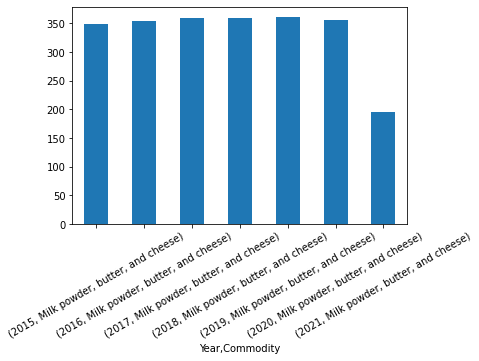

In [45]:
td_chart1 = td_doll.loc[(td_doll['Country'] == 'China') & (td_doll['Commodity'] == 'Milk powder, butter, and cheese') & (td_doll['Transport_Mode'] == 'All')]
#td_chart1.groupby('Year').Commodity.value_counts().plot(kind='bar', rot = 30)
td_chart1.groupby('Year').Commodity.value_counts().plot(kind='bar', rot = 30)

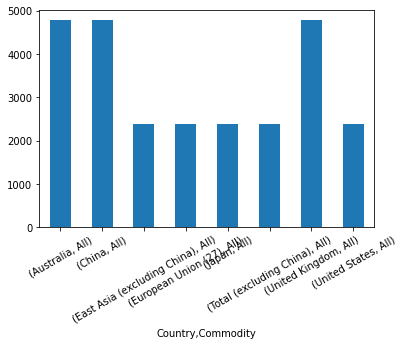

In [49]:
td_chart2 = td_doll.loc[(td_doll['Country'] != 'All') & (td_doll['Commodity'] == 'All') & (td_doll['Transport_Mode'] == 'All')]
#td_chart2.groupby('Year').Commodity.value_counts().plot(kind='bar', rot = 30)
td_chart2.groupby('Country').Commodity.value_counts().plot(kind='bar', rot = 30)

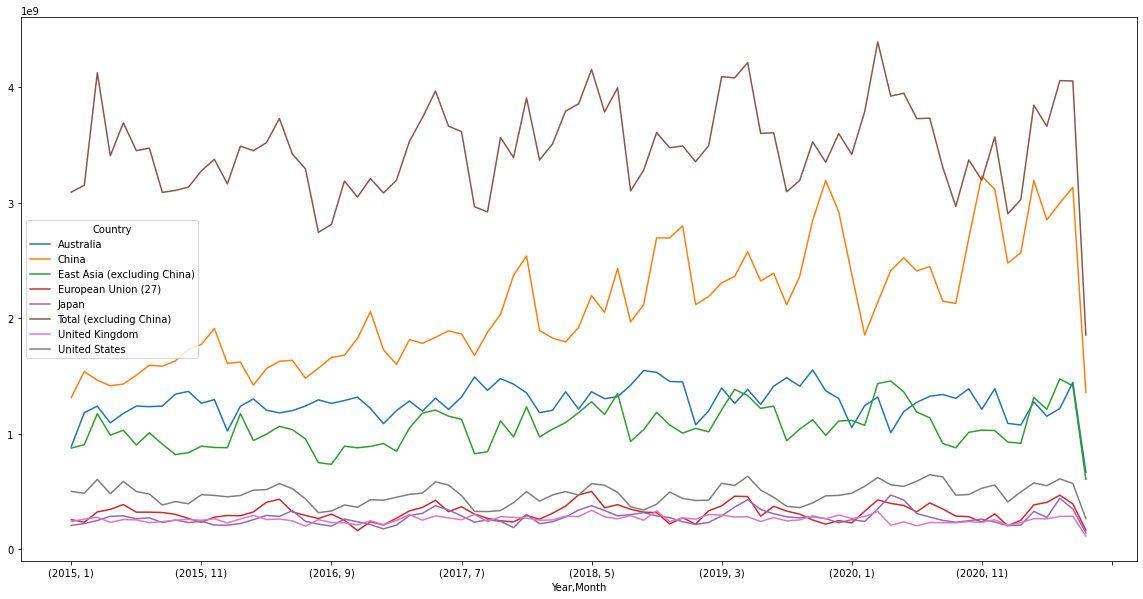

In [88]:
td_chart3 = td_doll.loc[(td_doll['Country'] != 'All') & (td_doll['Commodity'] == 'All') & (td_doll['Transport_Mode'] == 'All')]
c3 = td_chart3.pivot_table(index=['Year', 'Month'], columns=['Country'],
                    values='Value', aggfunc='sum')

c3.plot(figsize=(20, 10))

### Q1: ____

### Q2: ____

### Lessons Learned

### Next Steps